### Wine Quality Prediction
The below 12 features are common to both red wine and white wine datasets.

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality

### Import related libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Import dataset

In [2]:
df=pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,neutral,white
1,6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,neutral,white
2,6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,slightly dissatisfied,white
3,7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,neutral,white
4,7.0,0.46,0.20,16.7,0.046,50.0,184.0,0.99898,3.08,0.56,9.4,slightly dissatisfied,white


### EDA

In [11]:
import dtale

dtale.show(df)

C:\Users\User\anaconda3_\Lib\site-packages\dtale\column_analysis.py:512: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\User\anaconda3_\Lib\site-packages\dtale\column_analysis.py:512: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\User\anaconda3_\Lib\site-packages\dtale\column_analysis.py:403: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\User\anaconda3_\Lib\site-packages\dtale\column_analysis.py:403: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\User\anaconda3_\Lib\site-packages\dtale\column_analysis.py:403: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use 

In [3]:
print("There are {} rows and {} columns". format(df.shape[0], df.shape[1]))

There are 6497 rows and 13 columns


In [4]:
round(df.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90


### Check for missing values and duplicating rows

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

### Plot Histogram

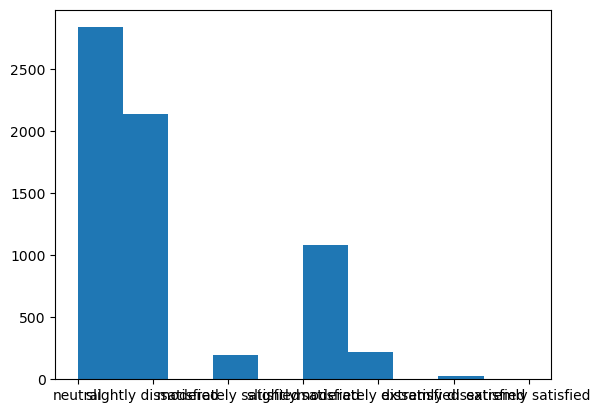

In [6]:
plt.hist(df["quality"])
plt.show()

In [12]:
fig1=px.histogram(df,x='quality')
fig1.show()

In [13]:
#Plot Bar Chart for Output Classes
#df['color'].value_counts().plot(kind='bar') # need to add kind = instead of bar only for this version

fig2=px.histogram(df,x='color')
fig2.show()

In [14]:
# Set the x attributes and y attribute 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


### Feature Engineering 
#### Standardising Feature Variables

In [16]:
# Transform Categorical Features with Dummy Variable

X = pd.get_dummies(X,drop_first=False) # Activate the drop_first=False to keep the fisrst column (quality_extremly dissatisfied) for dummies data.
X.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_extremly dissatisfied,quality_extremly satisfied,quality_moderately dissatisfied,quality_moderately satisfied,quality_neutral,quality_slightly dissatisfied,quality_slightly satisfied
0,6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,False,False,False,False,True,False,False
1,6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,False,False,False,False,True,False,False
2,6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,False,False,False,False,False,True,False
3,7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,False,False,False,False,True,False,False
4,7.0,0.46,0.20,16.7,0.046,50.0,184.0,0.99898,3.08,0.56,9.4,False,False,False,False,False,True,False
5,6.4,0.69,0.09,7.6,0.044,34.0,144.0,0.99480,3.26,0.38,10.1,False,False,False,False,True,False,False
6,5.7,0.26,0.27,4.1,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,False,False,False,False,True,False,False
7,9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,False,False,False,False,False,True,False
8,7.1,0.75,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,False,False,False,False,True,False,False
9,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,False,False,False,False,True,False,False


In [17]:
X.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_extremly dissatisfied', 'quality_extremly satisfied',
       'quality_moderately dissatisfied', 'quality_moderately satisfied',
       'quality_neutral', 'quality_slightly dissatisfied',
       'quality_slightly satisfied'], dtype=object)

### Correlation Matrix

In [20]:
corr = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

ValueError: could not convert string to float: 'neutral'

To get a much better understanding of the relationships between attributes in a quick glimpse.

Immediately, there are some variables that are strongly correlated to quality. It’s likely that these atributes are also the most important features in our machine learning model, but we’ll take a look at that later.

In [21]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [22]:
# feature scaling 

#Standardise feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

### Training the Decision Tree Classification model

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', splitter='best',
    max_depth=None,
    min_samples_split=15,
    min_samples_leaf=7,random_state = 0) #May use either gini/ entropy for criterion
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7, min_samples_split=15, random_state=0)

### Model evaluation

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 388   21]
 [  12 1204]]


0.9796923076923076

In [26]:
from sklearn import tree

import graphviz
# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, label='all',
    filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [27]:
# Save the tree diagram

graph.render("decision_tree_wine_dataset_gini")

NameError: name 'graph' is not defined